In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import os
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import seaborn as sns
import timeit
from sklearn import tree


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
test=pd.read_csv("../input/ece-657a-w20-asg3-part-1/testX.csv")
train=pd.read_csv("../input/ece-657a-w20-asg3-part-1/train.csv")
sample=pd.read_csv("../input/ece-657a-w20-asg3-part-1/samplesubmission.csv")

/kaggle/input/ece-657a-w20-asg3-part-1/samplesubmission.csv
/kaggle/input/ece-657a-w20-asg3-part-1/train.csv
/kaggle/input/ece-657a-w20-asg3-part-1/testX.csv


In [2]:
test

,Id,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,0,0,0,0,0,0,0,1,0,...,169,131,0,0,0,0,0,0,0,0
9998,9998,0,0,0,1,0,0,0,0,24,...,85,104,138,51,0,3,0,0,0,0


In [3]:
train

,Id,Label,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,10000,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10002,0,0,0,0,0,0,0,0,0,...,31,9,0,0,0,0,0,0,0,0
3,10003,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10004,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,69995,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,69996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,69997,4,0,0,0,0,0,0,0,0,...,27,0,0,0,0,0,0,0,0,0
59998,69998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X=train.iloc[:,2:786]
y=train.iloc[:,1]

In [5]:
sample.head()

,Id,Label
0,0,3
1,1,3
2,2,3
3,3,3
4,4,3


In [6]:
train['Label'].unique()

array([4, 0, 1, 2, 3])

In [7]:
y

0        4
1        0
2        0
3        4
4        1
        ..
59995    3
59996    0
59997    4
59998    0
59999    2
Name: Label, Length: 60000, dtype: int64

> # NORMALIZING



X

In [8]:
X

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,31,9,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,31,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,27,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# scaler=StandardScaler() #can also be done by dividing by 255.
# scaler=scaler.fit(X_train)
# X_train_normalized=scaler.transform(X_train)
# X_test_normalized=scaler.transform(X_test)
X_normalized=X/255;

In [10]:
X_normalized

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.000000,...,0.121569,0.035294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.121569,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.105882,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# FINDIND E.V

In [11]:
pca=PCA(random_state=42)
pca.fit(X_normalized)
explained_variance_ratio=pca.explained_variance_ratio_

In [12]:
explained_variance_ratio=pd.DataFrame(explained_variance_ratio)

In [13]:
explained_variance_ratio

,0
0,2.905760e-01
1,1.769339e-01
2,6.027798e-02
3,4.958797e-02
4,3.845483e-02
...,...
779,1.077699e-07
780,9.408418e-08
781,1.462261e-08
782,7.898940e-09


In [14]:
explained_variance_ratio=explained_variance_ratio.to_numpy()

In [15]:
cum_exp_variance = np.cumsum(explained_variance_ratio)


In [16]:
cum_exp_variance=pd.DataFrame(cum_exp_variance)

In [17]:
cum_exp_variance_percentage=cum_exp_variance*100

In [18]:
cum_exp_variance_percentage

,0
0,29.057596
1,46.750988
2,52.778786
3,57.737583
4,61.583066
...,...
779,99.999988
780,99.999998
781,99.999999
782,100.000000


In [19]:
achieved_85=cum_exp_variance_percentage.loc[cum_exp_variance_percentage[0]>85.0,:]
# achieved_85=(cum_exp_variance[0].gt(95.00000000) & cum_exp_variance[0].lt(95.00334665)).idxmax()  

In [20]:
achieved_85

,0
42,85.072217
43,85.255237
44,85.430225
45,85.600768
46,85.769306
...,...
779,99.999988
780,99.999998
781,99.999999
782,100.000000


In [21]:
index=achieved_85.index.values.tolist() 

In [22]:
comp_giving_85_per_exp_var=index[0]

In [23]:
comp_giving_85_per_exp_var

42

## we find out that 10%of the features are explaining 85% of the variance.

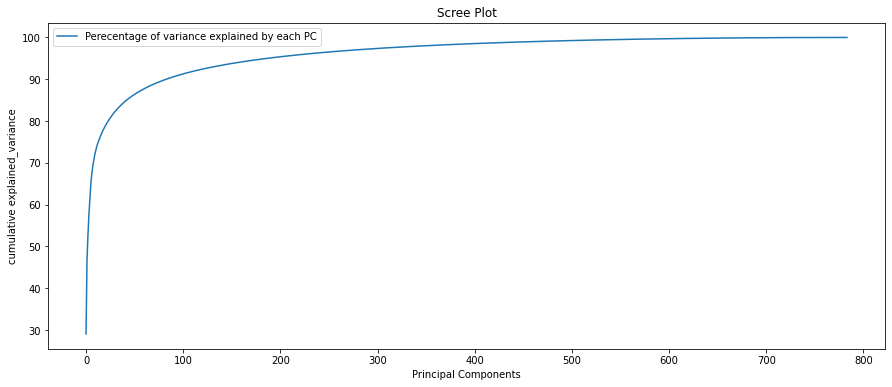

In [24]:
plt.figure(figsize=(15,6))
plt.plot(cum_exp_variance_percentage)
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('cumulative explained_variance')
plt.legend(['Perecentage of variance explained by each PC'], loc='best')

# Applying pca on whole data before splitting into train and val


## Finding principal components giving 85% variance i.e 42 components in our case..(feature extraction)

In [25]:
pca1=PCA(n_components=comp_giving_85_per_exp_var,random_state=42)
X_principal_components=pca1.fit_transform(X_normalized)

In [26]:
X_principal_components=pd.DataFrame(X_principal_components)
X_principal_components

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,-2.804552,3.290286,0.631799,-1.787523,-0.508000,1.325932,1.161249,2.516086,1.365593,0.136634,...,1.759555,0.662932,-0.000589,0.555349,0.360103,-0.661330,-1.392267,-0.692608,0.808090,-0.282443
1,-6.987036,-0.480877,1.202007,-0.704023,0.293283,0.617802,0.178840,-0.555418,0.183128,0.127671,...,0.254391,-0.336845,-0.125450,0.065460,-0.044088,0.125892,0.115589,-0.256072,-0.000146,-0.010585
2,-3.342652,-3.331028,1.576458,2.034754,-0.174688,1.560795,-0.259812,0.531713,0.222490,-0.353329,...,0.248626,-0.163674,0.251406,-0.006143,0.015088,0.519075,0.066762,-0.402723,-0.053013,-0.261855
3,-3.058246,4.419655,0.557312,-3.737588,0.635605,2.084057,1.460674,2.205364,0.297443,0.302432,...,-0.156935,-0.576225,-0.445210,-1.157764,-0.211038,0.556197,-0.103084,0.191319,-0.090650,0.188264
4,-5.306835,2.011935,-0.887940,-2.886186,0.369533,1.012921,-0.832038,-1.974068,-0.103193,0.645955,...,0.203633,-0.979995,-0.006093,0.190838,-0.566220,-0.230351,0.099704,-0.064384,0.155677,-0.523548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-2.279582,5.223946,-4.084964,1.303197,-1.797352,-0.243620,-1.926986,1.431276,-0.142082,-0.685116,...,0.263107,0.398877,0.041209,0.478828,0.375825,0.339230,0.550807,0.140484,0.455400,-0.214458
59996,-3.639983,-4.955288,0.575131,0.382346,-1.412937,-0.969126,0.732864,0.627209,-0.286808,-0.262753,...,0.244595,-0.024281,-0.013831,-0.224738,0.256490,0.327812,-0.137339,0.067887,-0.061310,-0.315358
59997,-2.004097,-2.848072,-0.804216,3.553564,4.262419,-0.115812,-0.566121,1.573481,-0.455203,-1.250105,...,0.165817,-0.088972,-0.236528,0.107878,0.079852,0.552152,-0.019042,0.493298,0.184191,-0.333847
59998,-0.871814,-5.535793,-1.745064,-1.209664,-1.739987,-2.040115,1.210148,-0.094441,1.368534,-0.604123,...,0.541539,-0.295037,1.052079,-0.054140,0.037821,0.029058,-0.250644,-0.181034,0.183806,0.069766


# Splitting the original train data(Given in "train.csv") into train and test in the ratio of 80:20 for making comparisons between different algorithms of: "Feature selection", "Feature Extraction" and "Classification".

In [27]:
# X=train.iloc[:,2:786]
# y=train.iloc[:,1]
X_train,X_test,y_train,y_test=train_test_split(X_principal_components,y,test_size=0.2,random_state=42)

In [28]:
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

In [29]:
X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

In [30]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,7.279599,2.458070,1.374209,0.133166,0.350090,-0.699778,-0.200433,-0.182395,-0.446278,-0.358444,...,0.530986,-0.247610,-1.337785,-0.191330,-0.369154,0.380938,0.440311,0.362708,-0.230189,0.327641
1,-0.904221,-5.380364,-1.033610,-0.700360,-1.440276,-1.352267,0.914877,0.548029,-0.680085,0.434038,...,-0.101998,-0.183583,-0.257052,0.885505,0.278563,-0.113962,0.377765,0.346174,0.077512,0.238529
2,-0.483751,-2.822672,0.832741,1.551463,0.528951,1.577614,-1.408554,-0.227197,-0.326205,0.613622,...,-0.489266,-0.081879,-0.249389,0.094780,0.239827,-0.056391,-0.436857,-0.229022,-0.181637,0.056313
3,3.227175,-4.094277,-3.945510,-1.331841,2.236712,-0.859481,0.475470,-0.248611,0.432142,-0.761024,...,0.519452,-0.406414,0.299102,-0.411953,-0.325322,0.179500,-0.390899,0.413664,0.569292,0.483848
4,-1.799162,5.516644,-4.430505,3.435187,-2.585482,-0.828482,-1.526767,-0.057083,-0.058486,0.868998,...,0.084974,-0.283367,-0.317038,0.105457,-0.547403,0.043933,0.358039,0.766957,0.367646,-0.420330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,-5.974266,1.274879,1.093132,-2.115804,0.787822,0.524321,0.739513,-0.398731,-0.129665,0.089928,...,0.143890,0.197290,-0.096641,0.362334,0.168087,0.019895,-0.038207,-0.040588,0.148514,-0.243442
47996,-1.409158,-5.266746,-0.806774,-0.626751,-1.159637,-1.126218,0.921720,0.534667,-0.201871,-0.027054,...,0.182126,0.105070,-0.053302,-0.184455,0.011963,-0.056007,0.076317,0.050755,-0.350855,-0.264053
47997,2.097986,2.548736,1.793815,1.564243,4.713204,0.260005,-0.896295,0.334934,-0.253401,-1.697549,...,0.987706,0.452384,-0.872365,-0.695059,0.189601,-0.042306,0.471207,0.223415,-0.475944,0.809157
47998,-5.114422,0.939819,-0.101117,2.263326,-0.178301,-0.816564,0.034295,0.928425,0.257043,0.205473,...,-0.556146,-0.061978,0.157752,-0.100627,0.011254,-0.185579,-0.531927,0.642132,-0.397788,-0.380529


In [31]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,-1.546678,-5.004335,-1.784333,-0.113322,0.513009,-1.559780,1.215885,-0.398990,3.742742,-2.146232,...,-0.228609,0.020243,-0.666711,-0.259494,0.905046,-0.208098,-0.522374,-0.460879,-0.691434,-0.107673
1,-3.653855,-1.547591,3.058420,1.834346,-0.313972,-0.692585,-0.810257,0.313949,0.380854,0.223179,...,0.048658,-0.063225,-0.079171,-0.299147,-0.248218,0.232747,-0.083542,-0.164345,-0.231405,-0.151849
2,-3.548927,4.895302,-3.148084,0.718700,-0.436122,-0.789214,-1.742157,1.400164,-0.972570,-1.018213,...,0.090157,-0.310224,0.298766,-0.303065,-0.171039,-0.114297,0.279233,0.356551,-0.363071,0.390773
3,0.936080,-4.234440,-1.072193,-0.234133,0.276348,-0.177779,-0.497890,0.067747,0.639204,-0.194349,...,0.188929,0.191851,-0.650589,-0.014929,0.204209,0.210877,-0.216901,-0.212623,0.036618,-0.324183
4,-2.003690,4.806864,0.616930,-4.499218,0.060665,2.812801,1.432929,1.868055,0.881296,0.385607,...,-0.964450,-0.431724,-0.444404,-1.249006,-0.334400,0.792749,0.543164,0.447908,-0.804889,0.447808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,-3.137980,-4.749487,0.194137,-0.069493,-0.865750,-0.790974,0.679865,0.720939,-0.371175,0.012928,...,0.342881,0.015192,-0.026921,0.745502,-0.297811,-0.195598,0.354629,0.398717,-0.148734,0.287008
11996,6.064220,1.386457,-0.755980,-1.900899,2.518013,0.671690,-0.304064,-1.129283,-0.339059,1.003840,...,-1.436928,-0.282744,-0.825427,0.543856,0.303896,0.360876,-0.339646,-0.715408,-0.035319,0.359555
11997,2.647016,2.179100,-0.003379,1.859514,5.674048,-3.582919,0.053505,0.335062,-1.188984,-0.191844,...,1.178220,-0.499539,0.406554,-0.273496,-0.309918,0.608962,0.094245,-0.148354,0.103015,-0.278143
11998,0.198034,-4.517531,-3.509138,-0.596591,1.805159,-1.339724,1.048153,-0.064864,1.890688,-1.654648,...,-0.562171,0.217863,0.319093,-0.168415,-0.164638,-0.622498,-0.023505,0.426273,0.315223,0.307474


In [32]:
y_train

,Label
0,3
1,0
2,2
3,2
4,3
...,...
47995,0
47996,0
47997,4
47998,2


In [33]:
y_test

,Label
0,1
1,0
2,2
3,1
4,4
...,...
11995,0
11996,3
11997,4
11998,1


# PREPARING THE FINAL TEST DATA 

In [34]:
test

,Id,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,0,0,0,0,0,0,0,1,0,...,169,131,0,0,0,0,0,0,0,0
9998,9998,0,0,0,1,0,0,0,0,24,...,85,104,138,51,0,3,0,0,0,0


In [35]:
unlabelled_test=test.iloc[:,1:]

In [36]:
unlabelled_test

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,1,0,0,...,169,131,0,0,0,0,0,0,0,0
9998,0,0,0,1,0,0,0,0,24,116,...,85,104,138,51,0,3,0,0,0,0


# Normalizing Test data 

In [37]:
unlabelled_test_normalized=unlabelled_test/255

In [38]:
unlabelled_test_normalized=pd.DataFrame(unlabelled_test_normalized)

In [39]:
unlabelled_test_normalized

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.000000,0.000000,0.000000,...,0.466667,0.447059,0.509804,0.298039,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.086275,...,0.000000,0.000000,0.003922,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.003922,0.000000,0.000000,...,0.662745,0.513725,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.003922,0.000000,0.000000,0.0,0.000000,0.094118,0.454902,...,0.333333,0.407843,0.541176,0.200000,0.000000,0.011765,0.0,0.0,0.0,0.0


# FEATURE EXTRACTION PCA

In [40]:
unlabelled_test_principal_components=pca1.transform(unlabelled_test_normalized)
unlabelled_test_principal_components=pd.DataFrame(unlabelled_test_principal_components)
unlabelled_test_principal_components

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,-0.487427,6.406424,-4.735303,0.977229,0.011151,-1.602971,-0.355349,0.793544,-0.145103,-0.094934,...,-0.100519,-0.358910,0.086051,-0.174715,0.255243,-0.504181,0.151689,-0.538797,-0.295047,0.334560
1,5.523505,-1.779829,-1.031667,1.453044,0.806353,4.969874,-0.603263,-0.893000,-0.580120,-0.832658,...,0.178503,-0.521161,-0.471528,0.239555,0.425249,-0.006098,-0.079793,-0.171921,-0.539918,-0.359014
2,-2.849534,-4.325875,0.411972,0.812624,-0.421283,-0.219840,-0.006051,0.190760,-0.408718,-0.283952,...,0.373479,-0.217137,-0.332328,-0.612233,-0.250233,0.577416,0.120366,0.002445,-0.036060,-0.445181
3,0.120222,-3.852617,0.794517,1.469391,0.047224,0.713510,-0.435932,0.044256,-1.310880,0.481232,...,0.379913,0.580512,-0.508327,0.475895,-0.597765,0.159641,0.046232,0.081358,-0.127637,0.240949
4,3.150653,-4.718138,-2.938262,-1.017647,1.601870,-0.594971,0.919010,0.559145,-0.025235,-0.619472,...,0.323340,-0.670504,0.268409,-0.113748,-0.349914,0.642659,0.464019,-0.220811,0.042455,-0.211076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-2.935782,5.143974,-2.966979,-0.110539,0.297547,-0.873206,-0.812876,1.702693,-1.292456,-1.065881,...,-0.559803,0.239669,1.124362,0.145188,0.839173,0.792182,0.605288,-0.422161,-0.211249,0.626327
9996,-6.951648,-1.526187,2.015984,0.758328,-0.200236,0.084599,-0.180772,1.097710,0.067976,-0.856141,...,-0.256206,0.317741,0.035251,-0.028364,0.923752,0.821737,0.345772,-0.398073,-0.053141,0.511794
9997,4.528635,-2.661631,-3.194936,-0.207922,3.276963,0.103088,-1.181108,0.731790,-0.088000,0.911759,...,-0.155724,0.075000,-1.189608,0.508121,-0.044454,0.266813,-0.313844,0.115861,-0.096654,0.106078
9998,-0.953637,-3.711841,1.471084,1.675547,-1.433053,2.648949,-0.554145,-0.425451,-0.784087,0.002318,...,-0.108735,-0.334269,-0.044456,-0.506908,0.026511,-0.097288,-0.338024,0.066295,0.013067,-0.252048


# DECISION TREE

## CROSS VAL SCORE | Criterion='gini'

### Mean Accuracy:  0.48514583333333333 at depth=  3  Time taken: 8.955950443996699
### Mean Accuracy:  0.6266041666666666 at depth=  5  Time taken: 14.156486516993027
### Mean Accuracy:  0.7079166666666667 at depth=  7  Time taken: 19.129805596996448
### Mean Accuracy:  0.7827083333333333 at depth=  10  Time taken: 26.32768580699485
### Mean Accuracy:  0.80975 at depth=  15  Time taken: 35.28414714799874
### Mean Accuracy:  0.8049583333333332 at depth=  20  Time taken: 40.048354578000726
### Mean Accuracy:  0.7981874999999999 at depth=  50  Time taken: 44.41565103500034  ---> same 
### Mean Accuracy:  0.7981874999999999 at depth=  75  Time taken: 45.57565351700032   ---> same 
### Mean Accuracy:  0.7981874999999999 at depth=  None  Time taken: 46.359718175001035  ---> same 

In [ ]:
from sklearn import tree
mean_accuracy=[]
timetaken=[]
max_depth=[3,5,7,10,15,20,50,75,None]
for i in max_depth:
    scores=[]
    start=timeit.default_timer()
    clfier_1=tree.DecisionTreeClassifier(max_depth=i,criterion='gini',random_state=42)
    scores=cross_val_score(clfier_1, X_train, y_train, cv=10)
    stop=timeit.default_timer()

    #splitting training data into train val data in ratio of 90:10.
    print("Mean Accuracy: ", scores.mean(),"at depth= ",i," Time taken:",stop-start)
    mean_accuracy.append(scores.mean())

In [ ]:
#plotting the graph of max depth vs accuracy.
import matplotlib as plt
plt.pyplot.scatter([3,5,7,10,15,20,50,75,0],mean_accuracy)
plt.pyplot.xlabel('Max Depth')
plt.pyplot.ylabel('Mean Accuracy')
plt.pyplot.title('Max depth vs Accuracy of Decision tree classifier')
plt.pyplot.legend(loc='best', title='None relabeling',labels=['None--> 0'])

# Decision Tree | Criterion='entropy'

### Mean Accuracy:  0.4799166666666667 at depth=  3  Time taken: 24.302092085999902
### Mean Accuracy:  0.6734791666666667 at depth=  5  Time taken: 39.1497254829992
### Mean Accuracy:  0.748125 at depth=  7  Time taken: 52.45439914400049
### Mean Accuracy:  0.8011458333333333 at depth=  10  Time taken: 67.9292816729976
### Mean Accuracy:  0.8120625 at depth=  15  Time taken: 79.98422932899848
### Mean Accuracy:  0.8080833333333333 at depth=  20  Time taken: 81.98011783200127
### Mean Accuracy:  0.8074791666666666 at depth=  50  Time taken: 83.29971088900129
### Mean Accuracy:  0.8074791666666666 at depth=  75  Time taken: 82.12922389600135
### Mean Accuracy:  0.8074791666666666 at depth=  None  Time taken: 84.96015837600135

In [ ]:
from sklearn import tree
mean_accuracy=[]
timetaken=[]
max_depth=[3,5,7,10,15,20,50,75,None]
for i in max_depth:
    scores=[]
    start=timeit.default_timer()
    clfier_1=tree.DecisionTreeClassifier(max_depth=i,criterion='entropy',random_state=42)
    scores=cross_val_score(clfier_1, X_train, y_train, cv=10)
    stop=timeit.default_timer()

    #splitting training data into train val data in ratio of 90:10.
    print("Mean Accuracy: ", scores.mean(),"at depth= ",i," Time taken:",stop-start)
    mean_accuracy.append(scores.mean())

In [ ]:
#plotting the graph of max depth vs accuracy.
import matplotlib as plt
plt.pyplot.scatter([3,5,7,10,15,20,50,75,0],mean_accuracy)
plt.pyplot.xlabel('Max Depth')
plt.pyplot.ylabel('Mean Accuracy')
plt.pyplot.title('Max depth vs Accuracy of Decision tree classifier')
plt.pyplot.legend(loc='best', title='None relabeling',labels=['None--> 0'])

# RESULT::
### BEST DEPTH => 15 IN ALL PARAMETER TUNING.--> {'entropy','gini'}
### BEST CRITERION=> Entropy

### Time complexity of 'entropy' is more than double to that of 'gini'.

#  APPLYING TO THE VALIDATION DATA 

## Accuracy: 81.38% at depth=  15 | criterion='gini' | Time taken: 3.969800364000548

In [44]:
start=timeit.default_timer()
clfier_2=tree.DecisionTreeClassifier(max_depth=15,random_state=42)
clfier_2.fit(X_train,y_train)
stop=timeit.default_timer()
y_pred=clfier_2.predict(X_test)
acc=accuracy_score(y_pred,y_test)
print("Accuracy: ", acc,"at depth= ",15," Time taken:",stop-start)


Accuracy:  0.8138333333333333 at depth=  15  Time taken: 3.9426736169989454


# Confusion Matrix | depth= 15 | criterion='gini'

In [45]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_pred, y_test)
print('Confusion Matrix:\n', con_mat)

Confusion Matrix:
 [[2163  149   79    0   12]
 [ 125 1928  252   73   42]
 [  79  244 1742  256  100]
 [   8   77  223 1840  219]
 [   4   26   68  198 2093]]


# Classification Report | depth= 15 | criterion='gini'

In [46]:
from sklearn.metrics import classification_report
class_rep = classification_report(y_pred, y_test, target_names = ['Class-0', 'Class-1', 'Class-2', 'Class-3', 'Class-4'])
print('Classification Report:\n', class_rep)

Classification Report:
               precision    recall  f1-score   support

     Class-0       0.91      0.90      0.90      2403
     Class-1       0.80      0.80      0.80      2420
     Class-2       0.74      0.72      0.73      2421
     Class-3       0.78      0.78      0.78      2367
     Class-4       0.85      0.88      0.86      2389

    accuracy                           0.81     12000
   macro avg       0.81      0.81      0.81     12000
weighted avg       0.81      0.81      0.81     12000



# ROC Curve depth= 15 | criterion='gini'

In [47]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
y_labelized= label_binarize(y_test, classes=[0,1,2,3,4])

In [48]:
y_labelized

array([[0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [49]:
y_labelized.shape

(12000, 5)

In [59]:
n_classes = y_labelized.shape[1]

In [64]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,7.279599,2.458070,1.374209,0.133166,0.350090,-0.699778,-0.200433,-0.182395,-0.446278,-0.358444,...,0.530986,-0.247610,-1.337785,-0.191330,-0.369154,0.380938,0.440311,0.362708,-0.230189,0.327641
1,-0.904221,-5.380364,-1.033610,-0.700360,-1.440276,-1.352267,0.914877,0.548029,-0.680085,0.434038,...,-0.101998,-0.183583,-0.257052,0.885505,0.278563,-0.113962,0.377765,0.346174,0.077512,0.238529
2,-0.483751,-2.822672,0.832741,1.551463,0.528951,1.577614,-1.408554,-0.227197,-0.326205,0.613622,...,-0.489266,-0.081879,-0.249389,0.094780,0.239827,-0.056391,-0.436857,-0.229022,-0.181637,0.056313
3,3.227175,-4.094277,-3.945510,-1.331841,2.236712,-0.859481,0.475470,-0.248611,0.432142,-0.761024,...,0.519452,-0.406414,0.299102,-0.411953,-0.325322,0.179500,-0.390899,0.413664,0.569292,0.483848
4,-1.799162,5.516644,-4.430505,3.435187,-2.585482,-0.828482,-1.526767,-0.057083,-0.058486,0.868998,...,0.084974,-0.283367,-0.317038,0.105457,-0.547403,0.043933,0.358039,0.766957,0.367646,-0.420330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,-5.974266,1.274879,1.093132,-2.115804,0.787822,0.524321,0.739513,-0.398731,-0.129665,0.089928,...,0.143890,0.197290,-0.096641,0.362334,0.168087,0.019895,-0.038207,-0.040588,0.148514,-0.243442
47996,-1.409158,-5.266746,-0.806774,-0.626751,-1.159637,-1.126218,0.921720,0.534667,-0.201871,-0.027054,...,0.182126,0.105070,-0.053302,-0.184455,0.011963,-0.056007,0.076317,0.050755,-0.350855,-0.264053
47997,2.097986,2.548736,1.793815,1.564243,4.713204,0.260005,-0.896295,0.334934,-0.253401,-1.697549,...,0.987706,0.452384,-0.872365,-0.695059,0.189601,-0.042306,0.471207,0.223415,-0.475944,0.809157
47998,-5.114422,0.939819,-0.101117,2.263326,-0.178301,-0.816564,0.034295,0.928425,0.257043,0.205473,...,-0.556146,-0.061978,0.157752,-0.100627,0.011254,-0.185579,-0.531927,0.642132,-0.397788,-0.380529


In [62]:
y_train

,Label
0,3
1,0
2,2
3,2
4,3
...,...
47995,0
47996,0
47997,4
47998,2


In [63]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,-1.546678,-5.004335,-1.784333,-0.113322,0.513009,-1.559780,1.215885,-0.398990,3.742742,-2.146232,...,-0.228609,0.020243,-0.666711,-0.259494,0.905046,-0.208098,-0.522374,-0.460879,-0.691434,-0.107673
1,-3.653855,-1.547591,3.058420,1.834346,-0.313972,-0.692585,-0.810257,0.313949,0.380854,0.223179,...,0.048658,-0.063225,-0.079171,-0.299147,-0.248218,0.232747,-0.083542,-0.164345,-0.231405,-0.151849
2,-3.548927,4.895302,-3.148084,0.718700,-0.436122,-0.789214,-1.742157,1.400164,-0.972570,-1.018213,...,0.090157,-0.310224,0.298766,-0.303065,-0.171039,-0.114297,0.279233,0.356551,-0.363071,0.390773
3,0.936080,-4.234440,-1.072193,-0.234133,0.276348,-0.177779,-0.497890,0.067747,0.639204,-0.194349,...,0.188929,0.191851,-0.650589,-0.014929,0.204209,0.210877,-0.216901,-0.212623,0.036618,-0.324183
4,-2.003690,4.806864,0.616930,-4.499218,0.060665,2.812801,1.432929,1.868055,0.881296,0.385607,...,-0.964450,-0.431724,-0.444404,-1.249006,-0.334400,0.792749,0.543164,0.447908,-0.804889,0.447808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,-3.137980,-4.749487,0.194137,-0.069493,-0.865750,-0.790974,0.679865,0.720939,-0.371175,0.012928,...,0.342881,0.015192,-0.026921,0.745502,-0.297811,-0.195598,0.354629,0.398717,-0.148734,0.287008
11996,6.064220,1.386457,-0.755980,-1.900899,2.518013,0.671690,-0.304064,-1.129283,-0.339059,1.003840,...,-1.436928,-0.282744,-0.825427,0.543856,0.303896,0.360876,-0.339646,-0.715408,-0.035319,0.359555
11997,2.647016,2.179100,-0.003379,1.859514,5.674048,-3.582919,0.053505,0.335062,-1.188984,-0.191844,...,1.178220,-0.499539,0.406554,-0.273496,-0.309918,0.608962,0.094245,-0.148354,0.103015,-0.278143
11998,0.198034,-4.517531,-3.509138,-0.596591,1.805159,-1.339724,1.048153,-0.064864,1.890688,-1.654648,...,-0.562171,0.217863,0.319093,-0.168415,-0.164638,-0.622498,-0.023505,0.426273,0.315223,0.307474


In [94]:
from sklearn.tree import DecisionTreeClassifier
nb1= OneVsRestClassifier(DecisionTreeClassifier(max_depth=15,random_state=42, criterion='entropy'))


In [96]:
X_test=X_test.to_numpy()

In [97]:
X_test

array([[-1.54667819e+00, -5.00433541e+00, -1.78433269e+00, ...,
        -4.60878606e-01, -6.91434184e-01, -1.07672574e-01],
       [-3.65385540e+00, -1.54759063e+00,  3.05841994e+00, ...,
        -1.64345028e-01, -2.31405249e-01, -1.51849020e-01],
       [-3.54892669e+00,  4.89530179e+00, -3.14808384e+00, ...,
         3.56551054e-01, -3.63071278e-01,  3.90773450e-01],
       ...,
       [ 2.64701620e+00,  2.17909994e+00, -3.37925746e-03, ...,
        -1.48354154e-01,  1.03015039e-01, -2.78143295e-01],
       [ 1.98033931e-01, -4.51753085e+00, -3.50913846e+00, ...,
         4.26273021e-01,  3.15222733e-01,  3.07473814e-01],
       [-6.78203826e-01, -5.26728157e+00, -1.48662388e+00, ...,
         6.27310609e-01,  1.24729493e-01,  5.12665955e-03]])

In [99]:
nb1.fit(X_train, y_train)

In [100]:
prob=nb1.predict_proba(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/multiclass.py:376: RuntimeWarning: invalid value encountered in true_divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]


In [101]:
prob

array([[1.75438596e-02, 9.82456140e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [9.99195938e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        8.04061954e-04],
       [0.00000000e+00, 0.00000000e+00, 4.49612403e-01, 5.50387597e-01,
        0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]])

In [102]:
prob.shape

(12000, 5)

### y_labelized is labelized y_test i.e labelized val data

### "Distance of the samples X to the separating hyperplane."

In [104]:
prob=pd.DataFrame(prob)

prob=prob.fillna(0)
prob=prob.to_numpy()

In [105]:
f_p_r = dict()
t_p_r = dict()
roc_auc = dict()

for j in range(n_classes):
    f_p_r[j], t_p_r[j], _ = roc_curve(y_labelized[:, j], prob[:, j])
    roc_auc[j] = auc(f_p_r[j], t_p_r[j])

In [106]:
print('fpr 0',f_p_r[0].shape)
print('fpr 1',f_p_r[1].shape)
print('fpr 2',f_p_r[2].shape)
print('fpr 3',f_p_r[3].shape)
print('fpr 4',f_p_r[4].shape)
print("\n\n")
print('tpr 0',t_p_r[0].shape)
print('tpr 1',t_p_r[1].shape)
print('tpr 2',t_p_r[2].shape)
print('tpr 3',t_p_r[3].shape)
print('tpr 4',t_p_r[4].shape)

fpr 0 (377,)
fpr 1 (785,)
fpr 2 (1092,)
fpr 3 (688,)
fpr 4 (624,)



tpr 0 (377,)
tpr 1 (785,)
tpr 2 (1092,)
tpr 3 (688,)
tpr 4 (624,)


In [107]:
print('roc_auc[0]',roc_auc[0])
print('roc_auc[1]',roc_auc[1])
print('roc_auc[2]',roc_auc[2])
print('roc_auc[3]',roc_auc[3])
print('roc_auc[4]',roc_auc[4])

roc_auc[0] 0.9591089732557935
roc_auc[1] 0.9101276766931079
roc_auc[2] 0.8921316065529785
roc_auc[3] 0.8848209868283451
roc_auc[4] 0.9159461480838375


### https://stackoverflow.com/questions/20113206/scikit-learn-svc-decision-function-and-predict

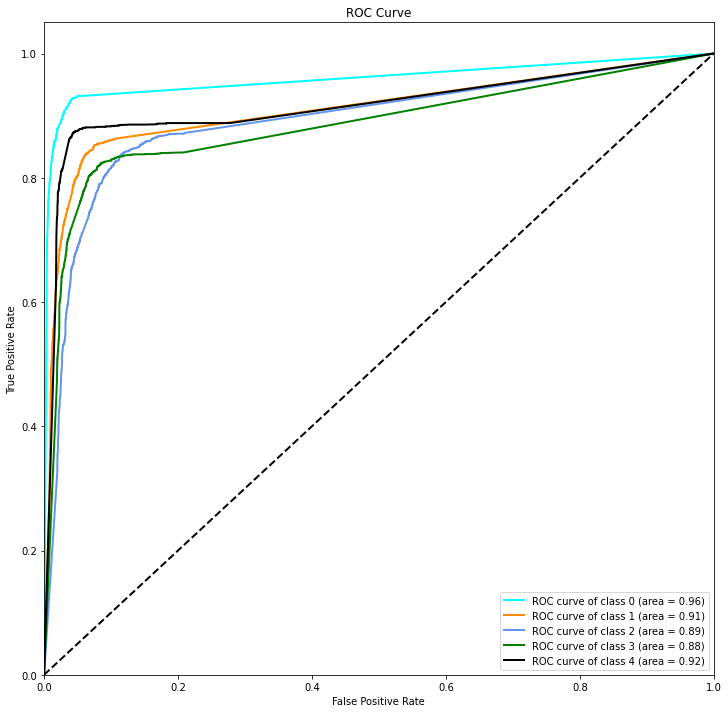

In [108]:
from itertools import cycle
p=2

plt.figure(figsize=(12,12))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'black'])
for i, color in zip(range(n_classes), colors):
    plt.plot(f_p_r[i], t_p_r[i], color=color, lw=p,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=p)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Accuracy: 81.52% at depth= 15 | criterion='entropy' | Time taken: 8.88460796200161

In [109]:
start=timeit.default_timer()
clfier_2=tree.DecisionTreeClassifier(max_depth=15,criterion='entropy',random_state=42)
clfier_2.fit(X_train,y_train)
stop=timeit.default_timer()
y_pred=clfier_2.predict(X_test)
acc=accuracy_score(y_pred,y_test)
print("Accuracy: ", acc,"at depth= ",20," Time taken:",stop-start)

Accuracy:  0.81525 at depth=  20  Time taken: 9.001226678999956


# Confusion Matrix | depth= 15 | criterion='entropy'

In [110]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_pred, y_test)
print('Confusion Matrix:\n', con_mat)

Confusion Matrix:
 [[2163  176   97    1    9]
 [ 146 1955  247   60   36]
 [  54  204 1713  278   69]
 [   2   69  237 1819  219]
 [  14   20   70  209 2133]]


# Classification Report | depth= 15 | criterion='entropy'

In [111]:
from sklearn.metrics import classification_report
class_rep = classification_report(y_pred, y_test, target_names = ['Class-0', 'Class-1', 'Class-2', 'Class-3', 'Class-4'])
print('Classification Report:\n', class_rep)

Classification Report:
               precision    recall  f1-score   support

     Class-0       0.91      0.88      0.90      2446
     Class-1       0.81      0.80      0.80      2444
     Class-2       0.72      0.74      0.73      2318
     Class-3       0.77      0.78      0.77      2346
     Class-4       0.86      0.87      0.87      2446

    accuracy                           0.82     12000
   macro avg       0.81      0.81      0.81     12000
weighted avg       0.82      0.82      0.82     12000



# ROC Curve depth= 15 | criterion='entropy'

In [112]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
y_labelized= label_binarize(y_test, classes=[0,1,2,3,4])

In [113]:
y_labelized

array([[0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [114]:
y_labelized.shape

(12000, 5)

In [115]:
n_classes = y_labelized.shape[1]

In [116]:
nb1= OneVsRestClassifier(tree.DecisionTreeClassifier(max_depth=15,criterion='entropy',random_state=42))
nb1.fit(X_train, y_train)

OneVsRestClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=15,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=42,
                                        

In [118]:
prob = nb1.predict_proba(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/multiclass.py:376: RuntimeWarning: invalid value encountered in true_divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]


In [119]:
prob

array([[1.75438596e-02, 9.82456140e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [9.99195938e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        8.04061954e-04],
       [0.00000000e+00, 0.00000000e+00, 4.49612403e-01, 5.50387597e-01,
        0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]])

In [121]:
prob=pd.DataFrame(prob)

prob=prob.fillna(0)
prob=prob.to_numpy()

In [122]:
prob.shape

(12000, 5)

### y_labelized is labelized y_test i.e labelized val data

### "Distance of the samples X to the separating hyperplane."

In [123]:
f_p_r = dict()
t_p_r = dict()
roc_auc = dict()

for j in range(n_classes):
    f_p_r[j], t_p_r[j], _ = roc_curve(y_labelized[:, j], prob[:, j])
    roc_auc[j] = auc(f_p_r[j], t_p_r[j])

In [124]:
print('fpr 0',f_p_r[0].shape)
print('fpr 1',f_p_r[1].shape)
print('fpr 2',f_p_r[2].shape)
print('fpr 3',f_p_r[3].shape)
print('fpr 4',f_p_r[4].shape)
print("\n\n")
print('tpr 0',t_p_r[0].shape)
print('tpr 1',t_p_r[1].shape)
print('tpr 2',t_p_r[2].shape)
print('tpr 3',t_p_r[3].shape)
print('tpr 4',t_p_r[4].shape)

fpr 0 (377,)
fpr 1 (785,)
fpr 2 (1092,)
fpr 3 (688,)
fpr 4 (624,)



tpr 0 (377,)
tpr 1 (785,)
tpr 2 (1092,)
tpr 3 (688,)
tpr 4 (624,)


In [125]:
print('roc_auc[0]',roc_auc[0])
print('roc_auc[1]',roc_auc[1])
print('roc_auc[2]',roc_auc[2])
print('roc_auc[3]',roc_auc[3])
print('roc_auc[4]',roc_auc[4])

roc_auc[0] 0.9591089732557935
roc_auc[1] 0.9101276766931079
roc_auc[2] 0.8921316065529785
roc_auc[3] 0.8848209868283451
roc_auc[4] 0.9159461480838375


### https://stackoverflow.com/questions/20113206/scikit-learn-svc-decision-function-and-predict

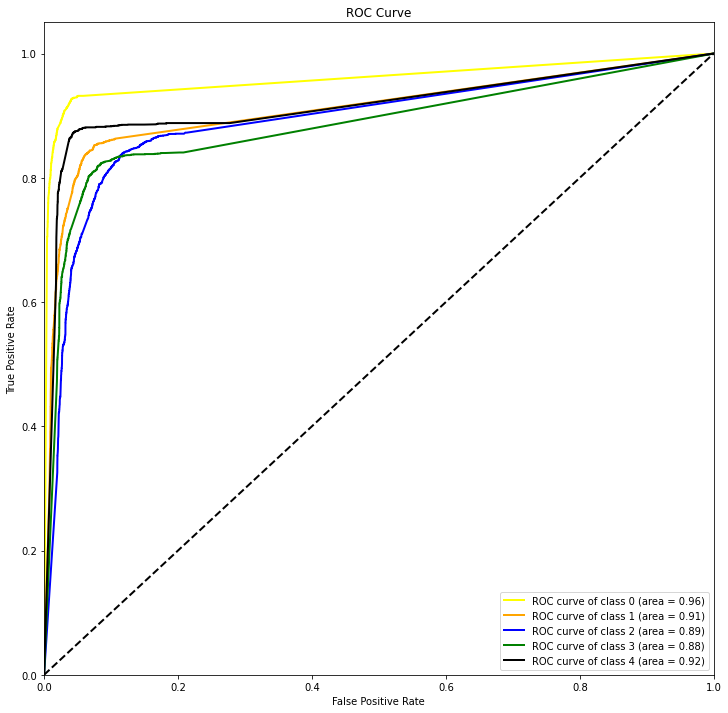

In [126]:
from itertools import cycle
p=2

plt.figure(figsize=(12,12))
colors = cycle(['yellow', 'orange', 'blue', 'green', 'black'])
for i, color in zip(range(n_classes), colors):
    plt.plot(f_p_r[i], t_p_r[i], color=color, lw=p,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=p)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Accuracy: 80.03% at Default valueas |depth= None | criterion='gini' | Time taken: 5.304394776001573

In [127]:
start=timeit.default_timer()
clfier_2=tree.DecisionTreeClassifier(max_depth=None,random_state=42)
clfier_2.fit(X_train,y_train)
stop=timeit.default_timer()
y_pred=clfier_2.predict(X_test)
acc=accuracy_score(y_pred,y_test)
print("Accuracy: ", acc,"at depth= ",'None'," Time taken:",stop-start)


Accuracy:  0.8003333333333333 at depth=  None  Time taken: 5.22884828899987


# Unlabelled test data 

## depth = 15 , criterion ='entropy'

In [128]:
start=timeit.default_timer()

clfier_2=tree.DecisionTreeClassifier(max_depth=15,criterion='entropy',random_state=42)
clfier_2.fit(X_principal_components,y)
y_pred=clfier_2.predict(unlabelled_test_principal_components)

stop=timeit.default_timer()
print('Time taken',stop-start)

Time taken 11.650092584997765


In [129]:
submission=y_pred
submission=pd.DataFrame(submission)
submission=pd.DataFrame.reset_index(submission)
submission.columns=['Id','Label']
submission


filename = 'submission.csv'
submission.to_csv(filename,index=False)
print('Saved file:' + filename)

Saved file:submission.csv
